In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("final_dataset1.csv", index_col=0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(2000, 13)

In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1406.27,19441.58,1.36,164.38,74.40,126.88,93.50,1.38,1.24,0.09,0.05,0.79,0.49
std,815.65,2505.79,0.48,8.07,14.90,24.94,107.11,0.69,0.59,0.29,0.22,0.41,0.50
min,0.00,14307.00,1.00,76.00,41.00,11.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,717.50,17557.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,1388.00,19712.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,2117.50,21297.25,2.00,170.00,82.25,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00
max,2826.00,23661.00,2.00,198.00,200.00,902.00,1200.00,3.00,3.00,1.00,1.00,1.00,1.00


In [5]:
df.cardio.value_counts()

0    1014
1     986
Name: cardio, dtype: int64

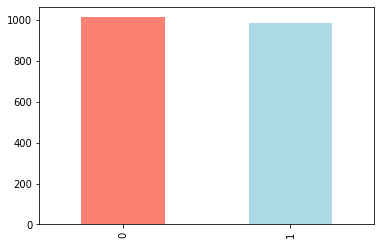

In [6]:
df.cardio.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
# Checking for missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

(13.5, -0.5)

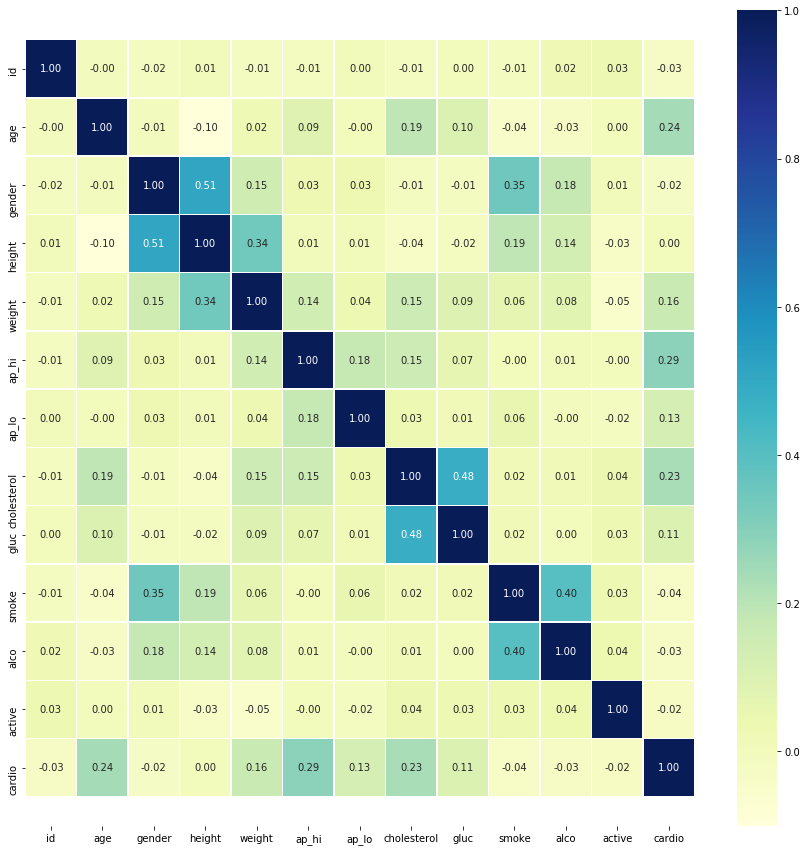

In [8]:
# Let's make our correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

id : [   0    1    2 ... 2823 2825 2826]
age : [18393 20228 18857 ... 21843 18841 21895]
gender : [2 1]
height : [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143]
weight : [ 62.   85.   64.   82.   56.   67.   93.   95.   71.   68.   80.   60.
  78.  112.   75.   52.   83.   69.   90.   45.   65.   59.   66.   74.
 105.   73.   55.   70.   72.   63.   50.  107.   84.   77.   79.   76.
  58.  115.   97.   53.   57.   49.  110.   94.   92.   87.  103.   88.
  99.  100.   61.   48.   54.   51.   47.   91.  104.   81.   98.  108.
  89.  101.   86.   65.5 142.   96.   44.   41.  169.  116.  200.   64.8
 120.  117.  125.  106.  114.  113.  129.  124.   42.  123.  111.  102.
 109.   46.  139.  150.  138.  131.   43.   83.6 134. ]
ap_hi : [110 140 130 150 100 120 145 170 135 125  90 180 160 133 190  80 122 169
 126 158 200  14 123  70

In [10]:
categorical_val.remove('cardio')
dataset = pd.get_dummies(df, columns = categorical_val)

In [11]:
dataset.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0,18393,168,62.00,110,80,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,1,20228,156,85.00,140,90,1,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,18857,165,64.00,130,70,1,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,3,17623,169,82.00,150,100,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,4,17474,156,56.00,100,60,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [12]:
print(df.columns)
print(dataset.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
Index(['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio', 'gender_1',
       'gender_2', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1',
       'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1',
       'active_0', 'active_1'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [14]:
dataset.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0,-0.42,0.45,-0.83,-0.68,-0.13,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,1,0.31,-1.04,0.71,0.53,-0.03,1,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,-0.23,0.08,-0.70,0.13,-0.22,1,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,3,-0.73,0.57,0.51,0.93,0.06,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,4,-0.79,-1.04,-1.24,-1.08,-0.31,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop('cardio', axis=1)
Y = dataset.cardio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# LOGISTIC REGRESSION

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)

# true negative,false negative,true positive,false positive
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

Precision= TP/(TP+FP)
Recall=TP/(TP+FN)
Accuracy=(TP+TN)/(TP+TN+FN+FP)
F1= 2*(Precision*Recall/(Precision+Recall))
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"Accuracy: {Accuracy}")
print(f"F1 Score: {F1}")


Accuracy Score: 72.33%
Precision: 0.7279411764705882
Recall: 0.6827586206896552
Accuracy: 0.7233333333333334
F1 Score: 0.704626334519573


C:\Users\Apurva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# SVM

In [103]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, Y_train)
pred=svm_clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)

# true negative,false negative,true positive,false positive
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

Precision= TP/(TP+FP)
Recall=TP/(TP+FN)
Accuracy=(TP+TN)/(TP+TN+FN+FP)
F1= 2*(Precision*Recall/(Precision+Recall))
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"Accuracy: {Accuracy}")
print(f"F1 Score: {F1}")

Accuracy Score: 53.00%
Precision: 0.5130718954248366
Recall: 0.5413793103448276
Accuracy: 0.53
F1 Score: 0.5268456375838926
